In [1]:
import sys
sys.path.append('C:\\0_Academy\\VScode\\00_Function\\')
import datetime
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#read file
from A1_read_data import read_csv_data
folder = '1.1 ALL windspeed/'
file_name = 'WIND_95m_1605-1912.csv'
data = read_csv_data(folder,file_name)

Import 'WIND_95m_1605-1912.csv'Done


In [3]:
data02 = data[['DateTime','WS95','WD95n']].copy()
data02['Year']   = data['DateTime'].apply(lambda x: x.year)
data02['Month']  = data['DateTime'].apply(lambda x: x.month)
seasons = [(month%12 + 3)//3 for month in range(1, 13)]
month_to_season = dict(zip(range(1,13), seasons))
data02['Season']= data02['Month'].apply(lambda x:month_to_season[x])
Season_dict = {1:'Winter',2:'Spring',3:'Summer',4:'Autumn'}
data02['Seasons'] = data02['Season'].apply(lambda x:Season_dict[x])
#data01['Monsoon']= data01['Month'].isin([1,2,3,10,11,12]) 

In [4]:
import seaborn as sns
from A3_select_data import DataRange
data02 = DataRange(data02,"2017-01-01", "2020-01-01")

In [6]:
data02

,DateTime,WS95,WD95n,Year,Month,Season,Seasons
0,2017-01-01 00:00:00,9.124528,15.934098,2017,1,1,Winter
1,2017-01-01 00:01:00,8.686667,17.366490,2017,1,1,Winter
2,2017-01-01 00:02:00,8.651667,16.633296,2017,1,1,Winter
3,2017-01-01 00:03:00,9.128333,17.000008,2017,1,1,Winter
4,2017-01-01 00:04:00,9.288333,17.666635,2017,1,1,Winter
...,...,...,...,...,...,...,...
1576795,2019-12-31 23:55:00,16.734333,18.951843,2019,12,1,Winter
1576796,2019-12-31 23:56:00,19.018000,19.341510,2019,12,1,Winter
1576797,2019-12-31 23:57:00,18.783167,19.776749,2019,12,1,Winter
1576798,2019-12-31 23:58:00,17.868000,19.697138,2019,12,1,Winter


In [62]:
from A2_add_variable import Convert_Angle01, Convert_Angle
def Convert_Angle01(data,Height):
    # from -pi~pi to 0~2pi
    pi = np.pi
    wd = data['WD{}n'.format(Height)].copy()
    logic    = wd.apply(lambda x: x>0)
    wd_new   = np.where(logic,wd, wd+360 )
    data['WD{}'.format(Height)] = wd_new
    return data
data02 = Convert_Angle01(data02,95)
data02['WD95r'] = data02['WD95']-360

2017
2018
2019


Text(0.5, 0.9, 'Wind Speed (m/s)')

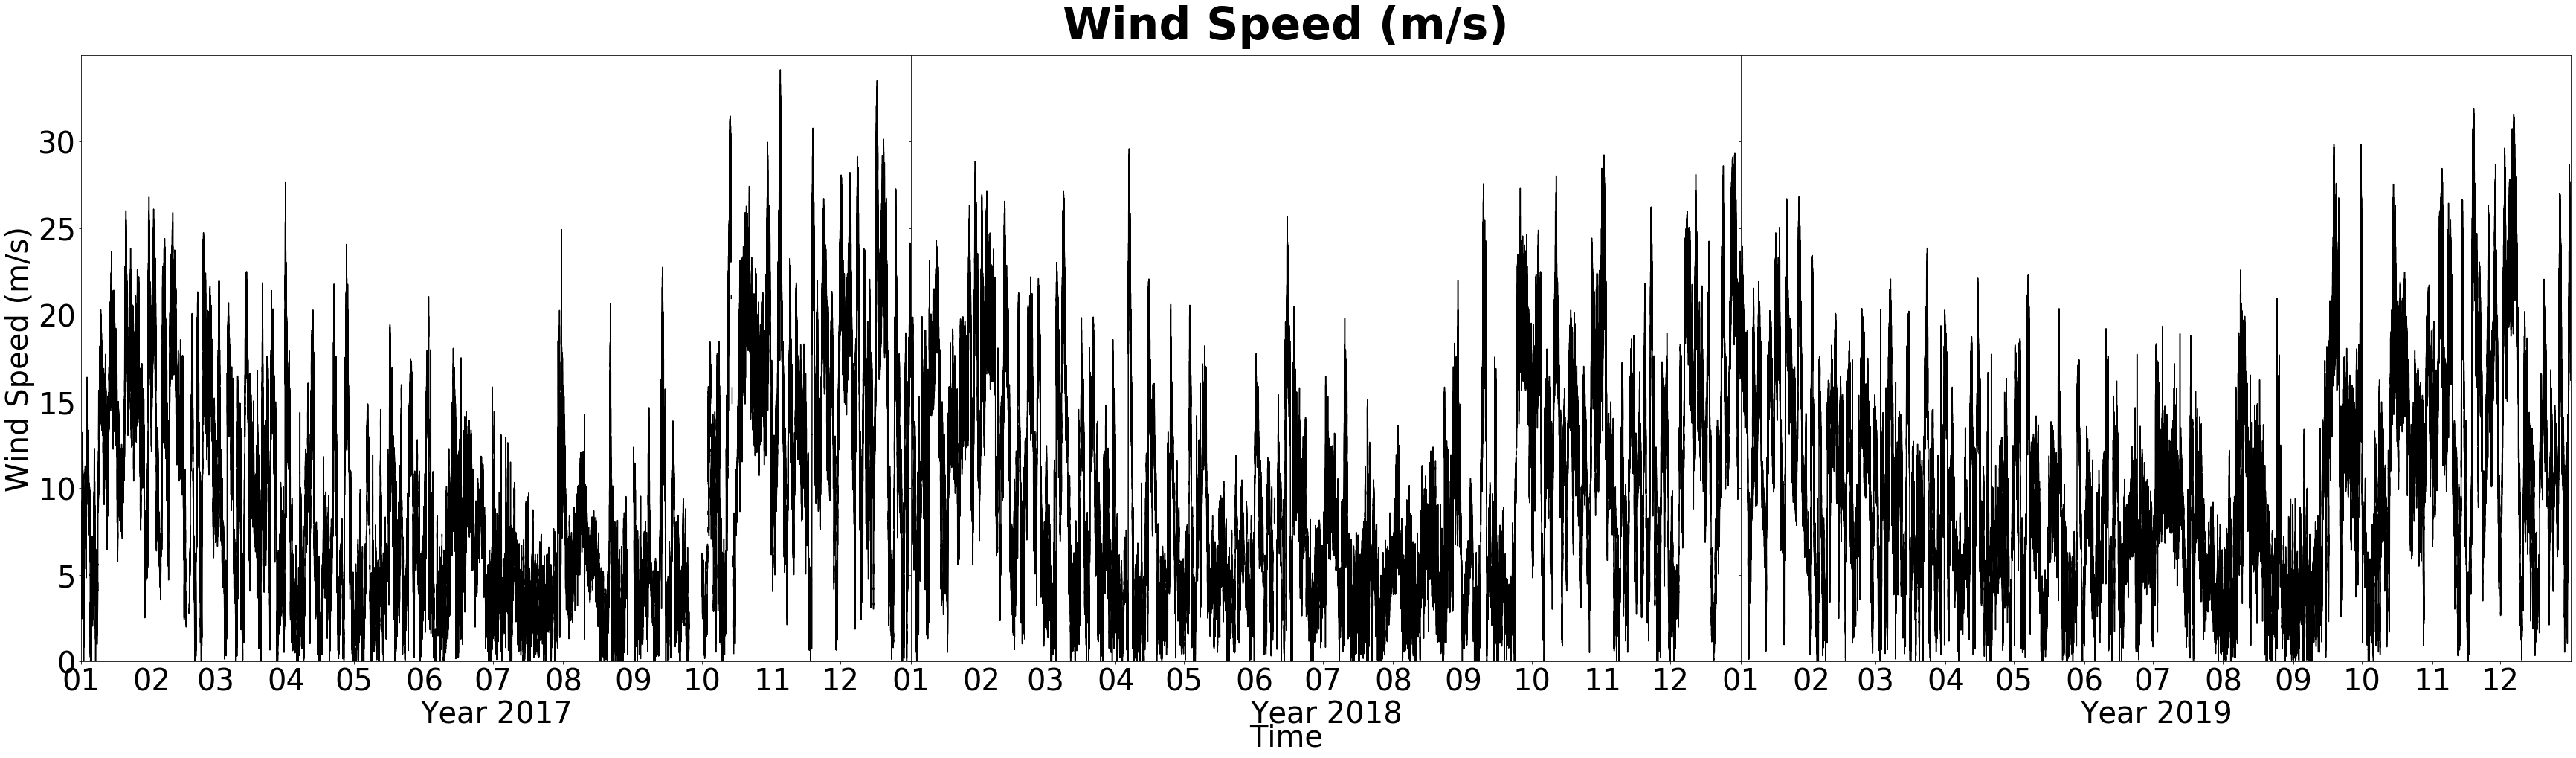

In [100]:
import matplotlib.dates as mdates
year = [2017,2018,2019]
fig, ax = plt.subplots(1,len(year),sharey=True, figsize=(60, 15),
                       gridspec_kw = {'wspace':0, 'hspace':0.5})

    
for j in range(len(year)):
    print(year[j])
    df = data02[data02['Year'] ==year[j]]
    df.reset_index(inplace=True,drop=True)

    ax[j].plot(df['DateTime'], df['WS95'],c='black')
    #ax[1,j].scatter(df['DateTime'],df['WD95'],s=1,c='grey')
    #ax[1,j].scatter(df['DateTime'],df['WD95r'],s=1,c='grey')
    #ax[1,j].scatter(df['DateTime'],df['WD95n'],s=1,c='black')
    u1 = df['DateTime'].iloc[0]
    u2 = df['DateTime'].iloc[-1]
    ax[j].xaxis.set_major_locator(mdates.MonthLocator())
    ax[j].xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    ax[j].set_xlim([u1,u2])
    ax[j].tick_params(axis="x", labelsize=40)
    ax[j].tick_params(axis="y", labelsize=40)
    ax[j].set_ylim([0,35])
    ax[j].set_yticks([0,5,10,15,20,25,30])
    ax[j].set_xlabel("Year {}".format(year[j]), fontsize=40)
ax[0].set_ylabel("Wind Speed (m/s)", fontsize=40)
fig.text(0.5, 0.02, 'Time', ha='center',size=40)
fig.text(0.5, 0.9, 'Wind Speed (m/s)', ha='center',fontweight='bold',size=60)

In [80]:
df = data02[data02['Year'] ==2017]

In [81]:
df

,DateTime,WS95,WD95n,Year,Month,Season,Seasons,WD95,WD95r
0,2017-01-01 00:00:00,9.124528,15.934098,2017,1,1,Winter,15.934098,-344.065902
1,2017-01-01 00:01:00,8.686667,17.366490,2017,1,1,Winter,17.366490,-342.633510
2,2017-01-01 00:02:00,8.651667,16.633296,2017,1,1,Winter,16.633296,-343.366704
3,2017-01-01 00:03:00,9.128333,17.000008,2017,1,1,Winter,17.000008,-342.999992
4,2017-01-01 00:04:00,9.288333,17.666635,2017,1,1,Winter,17.666635,-342.333365
...,...,...,...,...,...,...,...,...,...
525595,2017-12-31 23:55:00,18.643667,22.430055,2017,12,1,Winter,22.430055,-337.569945
525596,2017-12-31 23:56:00,18.297167,22.602909,2017,12,1,Winter,22.602909,-337.397091
525597,2017-12-31 23:57:00,19.189833,24.461724,2017,12,1,Winter,24.461724,-335.538276
525598,2017-12-31 23:58:00,19.097167,24.207125,2017,12,1,Winter,24.207125,-335.792875


2017
2018
2019


Text(0.5, 0.9, 'Wind Direction (°)')

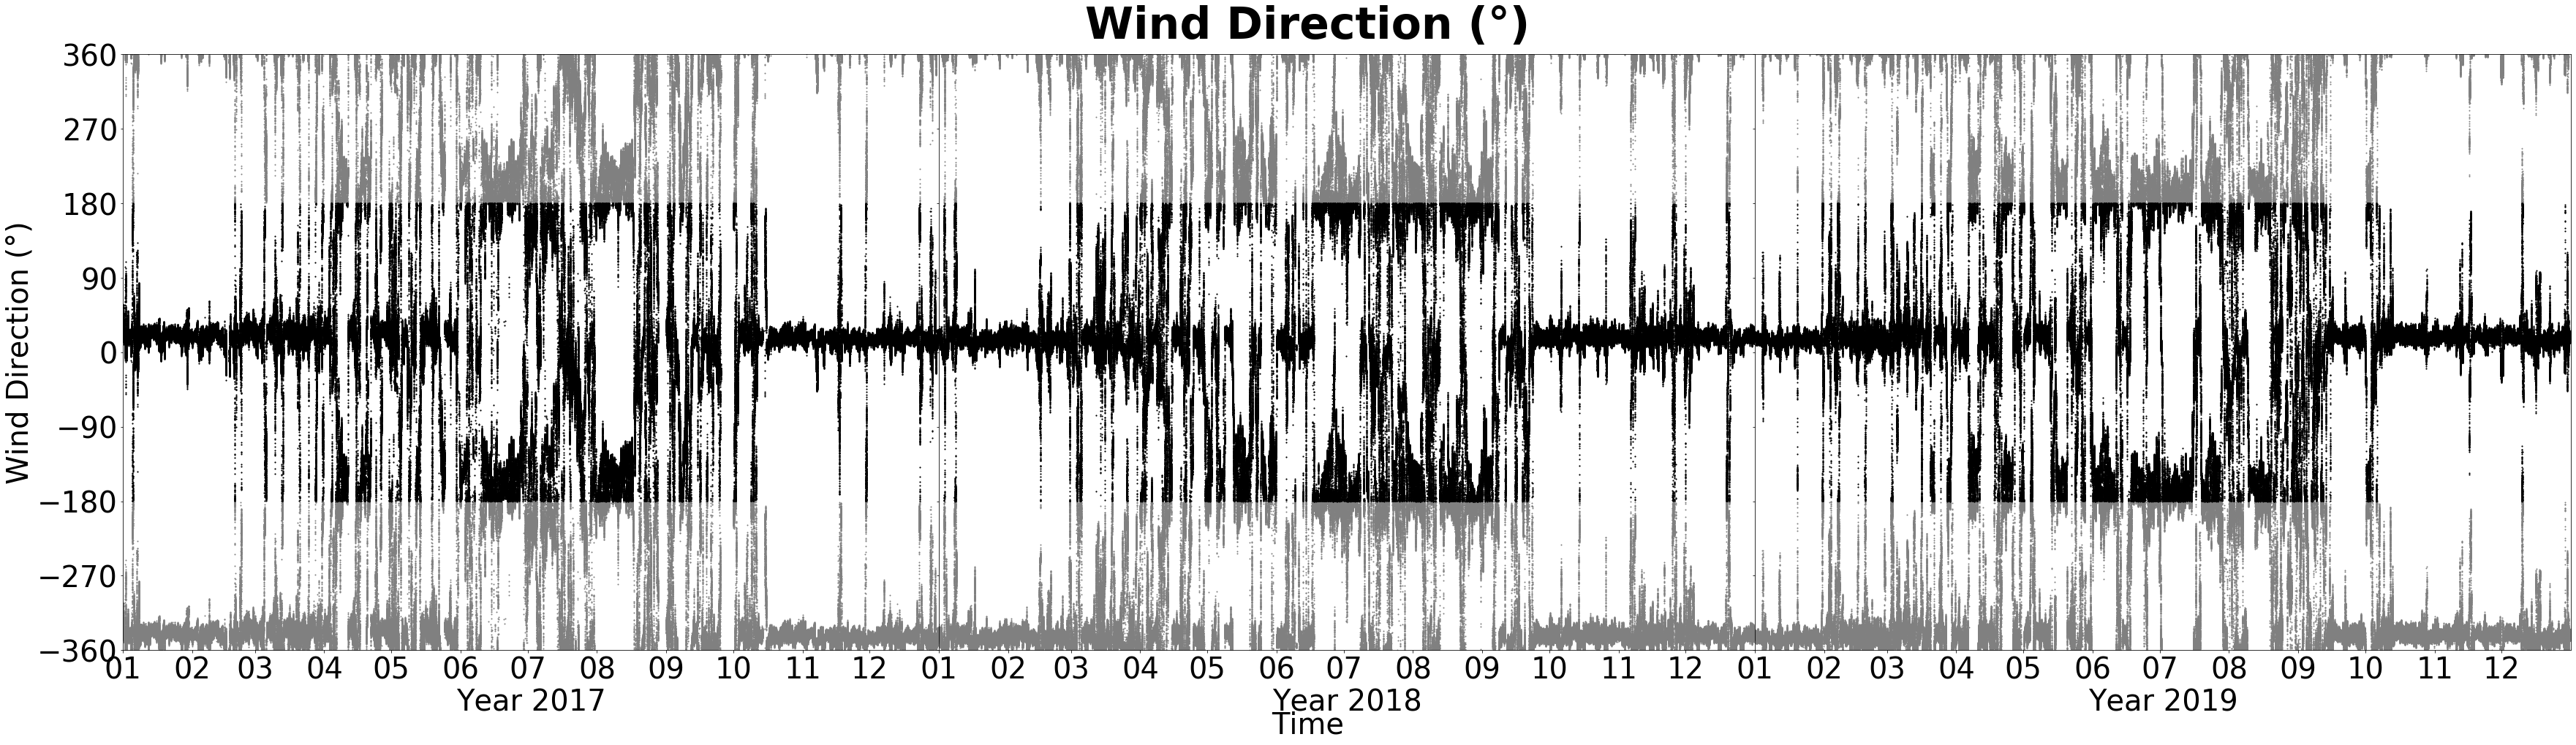

In [101]:
import matplotlib.dates as mdates
year = [2017,2018,2019]
fig, ax = plt.subplots(1,len(year),sharey=True, figsize=(60, 15),
                       gridspec_kw = {'wspace':0, 'hspace':0.5})

    
for j in range(len(year)):
    print(year[j])
    df = data02[data02['Year'] ==year[j]]
    df.reset_index(inplace=True,drop=True)
    ax[j].scatter(df['DateTime'],df['WD95'],s=1,c='grey')
    ax[j].scatter(df['DateTime'],df['WD95r'],s=1,c='grey')
    ax[j].scatter(df['DateTime'],df['WD95n'],s=1,c='black')
    u1 = df['DateTime'].iloc[0]
    u2 = df['DateTime'].iloc[-1]
    ax[j].xaxis.set_major_locator(mdates.MonthLocator())
    ax[j].xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    ax[j].set_xlim([u1,u2])
    ax[j].tick_params(axis="x", labelsize=40)
    ax[j].tick_params(axis="y", labelsize=40)
    ax[j].set_ylim([-360,360])
    ax[j].set_yticks([-360,-270,-180,-90,0,90,180,270,360])
    ax[j].set_xlabel("Year {}".format(year[j]), fontsize=40)
ax[0].set_ylabel("Wind Direction (°)", fontsize=40)
fig.text(0.5, 0.02, 'Time', ha='center',size=40)
fig.text(0.5, 0.9, 'Wind Direction (°)', ha='center',fontweight='bold',size=60)

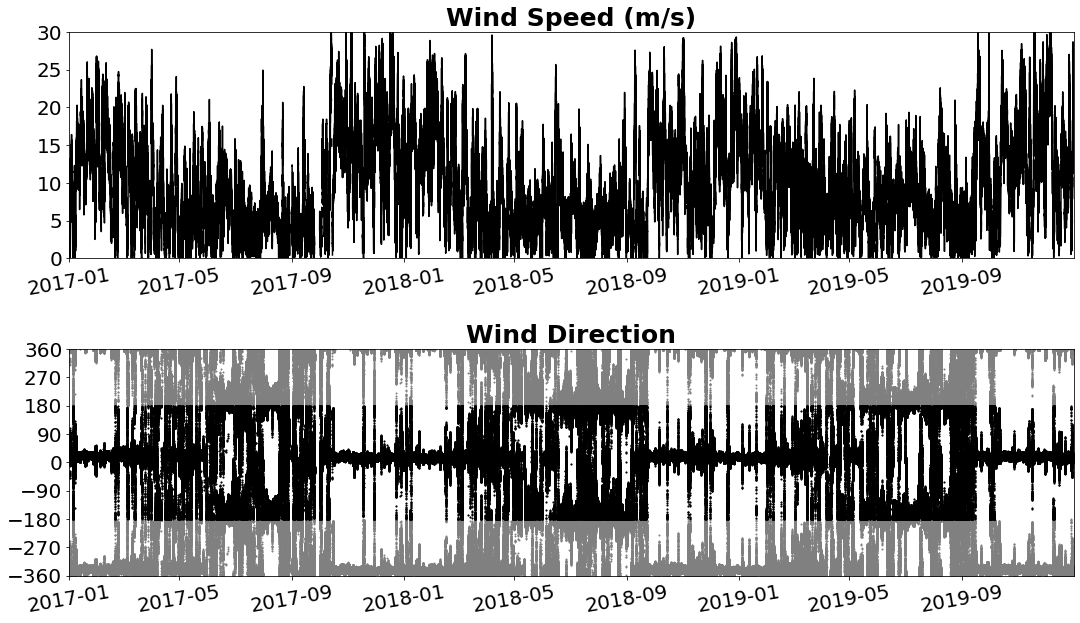

In [65]:
PLOT_WholeYear(data02)

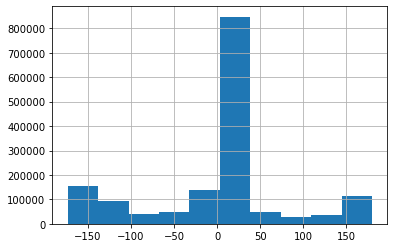

In [35]:
data02['WD95'].hist()